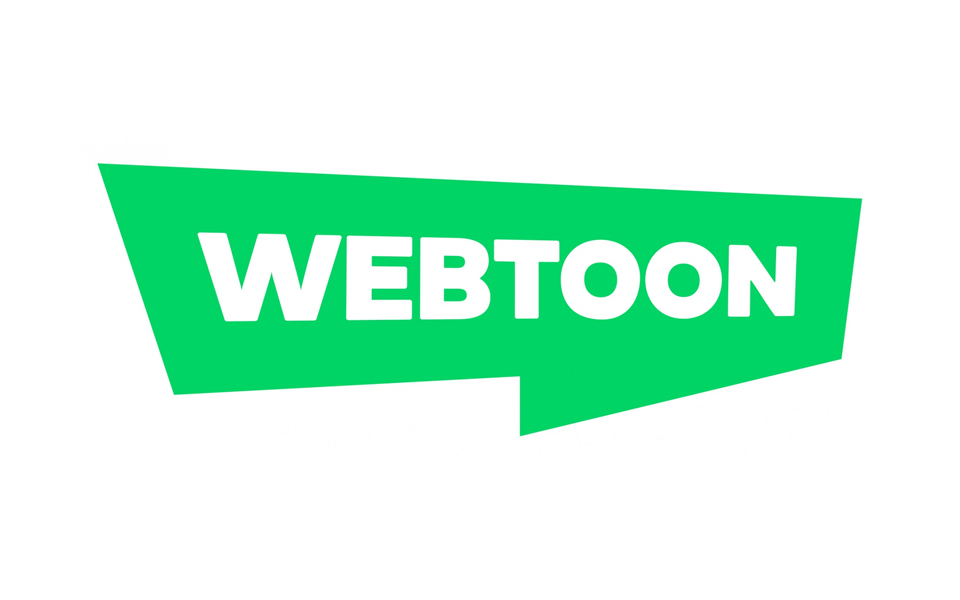

# **네이버 만화 챌린지 동적크롤링**
- 'https://comic.naver.com/genre/bestChallenge.nhn'

In [11]:
# 패키지 임포트
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import selenium
from selenium import webdriver
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By # 셀레니움 4.0부터 포함된 함수(필수)
from selenium.webdriver.chrome.service import Service

In [2]:
# 크롬 웹드라이버 생성 함수
def create_driver():
    service = Service()
    options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(service=service, options=options)
    return driver

## **🤖 html 소스 활용 bs4 객체로 파싱**

In [6]:
# Driver 객체 생성
driver = create_driver()

In [7]:
# URL 접근
url = 'https://comic.naver.com/genre/bestChallenge.nhn'
driver.get(url)

In [8]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
####### 첫번째 만화 타이틀 가져오기 #######

In [14]:
# 기본 방식
soup.find(id='content').find_all('ul')[1].find('li').find('span', {'class':'text'}).text
# 예약어 사용 (class_)
soup.find(id='content').find_all('ul')[1].find('li').find(class_='text').text

'아빠는 N살'

## **🫡 Selenium 드라이버 함수 활용 파싱**

In [15]:
# Driver 객체 생성
driver = create_driver()

In [16]:
# URL 접근
url = 'https://comic.naver.com/genre/bestChallenge.nhn'
driver.get(url)

In [ ]:
####### 첫번째 만화 타이틀 가져오기 #######

In [21]:
# Selector
sel = '#content > div:nth-child(2) > ul > li:nth-child(1) > div > a.ContentTitle__title_area--x24vt > span > span'

In [25]:
# Webelement 객체 생성
elem = driver.find_element(By.CSS_SELECTOR, sel)

In [26]:
# 출력
elem.get_attribute('innerHTML')

'아빠는 N살'

In [ ]:
####### 첫번째 페이지의 모든 만화 가져오기 (위 Selector 사용) #######

In [41]:
# 첫번째 만화 Selector
## '#content > div:nth-child(2) > ul > li:nth-child(1) > div
### #content - id가 content인 태그를 찾고
### div:nth-child(2) - div를 찾고 2번째 div를 선택
### ul - ul 태그 찾고
### li:nth-child(1) - 첫번째 list (첫번째 만화) 에서
### div - 만화 정보에 해당하는 div 불러오기 


# => 위 셀렉터에서 'li:nth-child(1)'(첫번째 만화) -> 'li'(모든 만화) 로 변경 ##########


# 첫번째 페이지의 모든 만화 Selector
## '#content > div:nth-child(2) > ul > li > div

In [ ]:
# Selector
sel = '#content > div:nth-child(2) > ul > li > div'

In [ ]:
# Webelement 객체 생성
elem = driver.find_elements(By.CSS_SELECTOR, sel)

In [28]:
print('모든 만화 갯수: ', len(elem))

모든 만화 갯수:  30


In [34]:
# 첫번째 만화 정보 출력
elem[0].get_attribute('innerHTML')
elem[0].get_attribute('innerText')

## Text (만화 정보) 뽑기 아래 방법 중 택 1
elem[0].get_attribute('innerText').split('\n')
elem[0].text.split('\n')

['UP', '아빠는 N살', '유영근', '별점', '9.90', '조회수', '5,065만']

In [35]:
# 10번째 만화 정보 출력
elem[10].get_attribute('innerText').split('\n')
elem[10].text.split('\n')

['일상다반사', '햄츄', '별점', '9.18', '조회수', '24만']

In [38]:
# 첫번째 페이지의 모든 만화 정보 출력해서 df로 생성
result = []
for e in elem:
    res = e.text.split('\n')
    if len(res) == 7: #'UP' text가 포함됬을 시 
        result.append(pd.DataFrame({'제목':res[1], '작가':res[2], '별점':res[4],
                                   '조회수':res[6]}, index=range(0,1)))
    else: #'UP' text 포함되지 않은 헝태일 때  
        result.append(pd.DataFrame({'제목':res[0], '작가':res[1], '별점':res[3],
                                   '조회수':res[5]}, index=range(0,1)))

In [39]:
pd.concat(result).reset_index(drop=True)

,제목,작가,별점,조회수
0,아빠는 N살,유영근,9.90,"5,065만"
1,별의별,별가사리,9.04,3.5만
2,클리너,koku****,9.33,9.4만
3,정의를 위한 나라,류기호,9.50,6.3만
4,집에 핀 봄팡이,봄팡이,9.52,26만
5,조금 수상한 연애시뮬레이션,초록이슬,9.81,22만
6,허니허니2 - 느리지만 괜찮아,정수B,9.89,134만
7,찐삼국사,이용훈,8.10,21만
8,동화인 : 영웅들의 이야기,반다,8.43,"6,978"
9,잿빛마을과 방랑소녀,수은양,9.49,4.8만


In [40]:
# driver close
driver.close()

## **🧞‍♂️ 1~20페이지 모든 만화 정보 크롤링 (동적 페이지 컨트롤)**

### 🔹 **Driver / URL**

In [2]:
# 크롬 웹드라이버 생성 함수
def create_driver():
    service = Service()
    options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(service=service, options=options)
    return driver

In [3]:
# Driver 객체 생성
driver = create_driver()

In [4]:
# URL 접근
url = 'https://comic.naver.com/genre/bestChallenge.nhn'
driver.get(url)

### 🔹 **Element 객체 생성**

In [5]:
# Selector
sel = '#content > div:nth-child(2) > ul > li > div'
# Webelement 객체 생성
elem = driver.find_elements(By.CSS_SELECTOR, sel)

### **🔹 코드 구조 파악**

**✔️ 한 페이지에 총 30개의 만화(list items)가 들어있는 것을 확인할 수 있다.**

In [6]:
print('한 페이지의 만화 갯수: ', len(elem))

한 페이지의 만화 갯수:  30


**✔️ 각 만화의 텍스트 정보는 2가지 패턴을 띈다.**

- 'UP' 이 들어있는 경우 : 7개의 텍스트 정보
- 'UP' 이 들어있지 않은 경우 : 6개의 텍스트 정보

In [7]:
print('w/ UP info: ', elem[10].text.split('\n'))
print('w/ UP lengths: ', len(elem[10].text.split('\n')))
print('w/o UP info: ', elem[25].text.split('\n'))
print('w/o UP lengths: ', len(elem[25].text.split('\n')))

w/ UP info:  ['UP', '쫑맨툰', '쫑맨', '별점', '8.93', '조회수', '13만']
w/ UP lengths:  7
w/o UP info:  ['아이 위시!', '차치', '별점', '7.55', '조회수', '9,667']
w/o UP lengths:  6


**✔️ [웹툰명, 작가이름, 별점] 추출할 때 'UP' 유뮤에 따라 인덱스 다르게 활용하기**

In [8]:
wUP = elem[10].text.split('\n')
wUP_info = [{'제목':wUP[1], '작가':wUP[2], '별점':wUP[4]}]
print('w/ UP index results: ', wUP_info)
woUP = elem[25].text.split('\n')
woUP_info = [{'제목':woUP[0], '작가':woUP[1], '별점':woUP[3]}]
print('wo/ UP index results: ', woUP_info)

w/ UP index results:  [{'제목': '쫑맨툰', '작가': '쫑맨', '별점': '8.93'}]
wo/ UP index results:  [{'제목': '아이 위시!', '작가': '차치', '별점': '7.55'}]


**✔️ 모든(1~20) 페이지를 크롤링하기 위해 페이지의 xpath patterns 파악하기**

**[xpath patterns]**

- `(navigate) prev page` : //*[@id="content"]/div[3]/button[1]
- `(첫 페이지의 첫 페이지) 1st page` : //*[@id="content"]/div[3]/button[2]
- `(첫 페이지의 마지막 페이지) 10st page` : //*[@id="content"]/div[3]/button[11]
- `(navigate) next page` : //*[@id="content"]/div[3]/button[12]

~ next page로 이동 ~

- `(navigate) prev page` : //*[@id="content"]/div[3]/button[1]
- `(두번째 페이지의 첫 페이지) 11st page` : //*[@id="content"]/div[3]/button[2]
- `(두번째 페이지의 마지막 페이지) 20st page` : //*[@id="content"]/div[3]/button[11]
- `(navigate) next page` : //*[@id="content"]/div[3]/button[12]

➡️ 페이지가 이동해도 페이지 구성 코드는 동일하다. 

➡️ 11st page 로 이동해도 button[13] 식으로 수가 누적되는 것이 아닌, button[2] 로 리셋됨! 

<br/>

**[페이지 컨트롤 for 문 작성시]**
- button[1]은 prev page 로 이동시키기 때문에 클릭하지 않음
- button[2]은 첫번째 for문 에서는 클릭 (다음 페이지로 이동해야 해서), 두번째 for문 부터는 클릭을 하지 않음 (다음 페이지로 넘어가는 button[12]가 button[2]를 대체하게 됨) 

In [9]:
k = 1 # 반복 핸들링 하는 변수 
j = -1 # 버튼 번호를 정하는 변수

for i in range(1,24): 
    if j == 12 :
        k += 3
    j = k%13
    k = k+1
    if j==1 or j==0:
        continue
    xpath = '//*[@id="content"]/div[3]/button['+ str(j)+']'
    print(k," ",j," ",xpath)

3   2   //*[@id="content"]/div[3]/button[2]
4   3   //*[@id="content"]/div[3]/button[3]
5   4   //*[@id="content"]/div[3]/button[4]
6   5   //*[@id="content"]/div[3]/button[5]
7   6   //*[@id="content"]/div[3]/button[6]
8   7   //*[@id="content"]/div[3]/button[7]
9   8   //*[@id="content"]/div[3]/button[8]
10   9   //*[@id="content"]/div[3]/button[9]
11   10   //*[@id="content"]/div[3]/button[10]
12   11   //*[@id="content"]/div[3]/button[11]
13   12   //*[@id="content"]/div[3]/button[12]
17   3   //*[@id="content"]/div[3]/button[3]
18   4   //*[@id="content"]/div[3]/button[4]
19   5   //*[@id="content"]/div[3]/button[5]
20   6   //*[@id="content"]/div[3]/button[6]
21   7   //*[@id="content"]/div[3]/button[7]
22   8   //*[@id="content"]/div[3]/button[8]
23   9   //*[@id="content"]/div[3]/button[9]
24   10   //*[@id="content"]/div[3]/button[10]
25   11   //*[@id="content"]/div[3]/button[11]
26   12   //*[@id="content"]/div[3]/button[12]
30   3   //*[@id="content"]/div[3]/button[3]


### **🔹 1~20페이지 모든 만화 정보 크롤링**

In [12]:
result= []
k = 1 # 반복 핸들링 하는 변수 
j = -1 # 버튼 번호를 정하는 변수

for i in range(1,24):
    if j == 12 :
        k += 3
    j = k%13
    k = k+1
    if j==1 or j==0:
        continue
    xpath = '//*[@id="content"]/div[3]/button['+ str(j)+']'
    btn_elem = driver.find_element(By.XPATH,xpath)
    btn_elem.click()
    time.sleep(2) # 페이지가 넘어갈 때의 로딩시간 고려 
    sel = '#content > div:nth-child(2) > ul > li > div'
    elem = driver.find_elements(By.CSS_SELECTOR,sel)
    for e in elem :
        res = e.text.split('\n')
        try:
            if len(res) == 7 :
                result.append(pd.DataFrame({'제목':res[1],'작가':res[2],'별점':res[4],'조회수':res[6]},index=range(0,1)))
            else :
                result.append(pd.DataFrame({'제목':res[0],'작가':res[1],'별점':res[3],
                                            '조회수':res[5]},index=range(0,1)))
        except:   # 텍스트 정보가 위 2가지 패턴에 해당되지 않을시를 고려
            continue 

In [14]:
print('크롤링 한 모든 만화의 갯수: ', len(result))

크롤링 한 모든 만화의 갯수:  660


In [15]:
# 저장
df_fin = pd.concat(result, ignore_index=True)

In [16]:
# 확인
df_fin

,제목,작가,별점,조회수
0,오감의 스펙트럼,붕어붕어빵,8.10,1.5만
1,커넥티드 월드,담디담,9.66,10만
2,교수도 사람이다,SAGA,9.74,460만
3,엑스트라 Z씨,라마거북,9.89,232만
4,호러타운,Vincent,9.52,2.5만
...,...,...,...,...
655,별을 품은 꽃,상바별,9.11,3.8만
656,반오십부터 그림일기,hans****,9.83,119만
657,핫캣일기,luna****,9.81,154만
658,빵뽀시래기,ㅎvㄹ,9.88,663만


In [17]:
driver.close()